Google colab link: https://colab.research.google.com/drive/1zOtQ95vavUbHxFQ5vyIV9VqE8MQm7Q7w?usp=sharing

**ADVANCE ARTIFICAL INTELLIGENCE 5043**

**ASSIGNMENT 1 - *Image_Classfication(Natural Scenes)***

---

**NAME :** ABDALLA MOHAMED GAAFAR MAHMOUD ALI

**MATRIC NO :** A21MJ4002





## Table of Content
- Dataset Brakdown
- Introduction
- The Code
  - Import libaraies
  - Data setup
  - Data generators
  - Defining the model
  - Model Compilation and training
  - Vodel Evalution
- Model Testing
- Results
- Models Comparison
- Conclusion



# Dataset breakdown

 The **Intel Image Classification** dataset is a collection of natural scene images that are divided into six categories: **buildings**, **forest**, **glacier**, **mountain**, **sea**, and **street**. The dataset contains around 25,000 images of size 150x150 pixels. The dataset is catagorized into two parts, the first part is gonna be used for traning the model and the other one be used to testing the model accurcy (seg_train, seg_test).


The dataset is available on Kaggle at https://www.kaggle.com/datasets/puneet6060/intel-image-classification/code.

# Introduction
In this project, I aim to build an image classification model using TensorFlow and Keras, two powerful libraries for machine learning and neural networks. The dataset of choice is the Intel Image Classification dataset, a rich collection of approximately 25,000 images categorized into six classes: buildings, forest, glacier, mountain, sea, and street. Each image is of size 150x150 pixels, providing a good resolution for our model to learn from.

The model will be trained on a subset of this dataset and also, validated on a separate testing set as well as on a real word pictures.

# The Code

## Import Libraries

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import PIL
from google.colab import drive


1. ```python
   import tensorflow as tf
   ```
   - This line imports TensorFlow, a powerful library for numerical computation, particularly well-suited for large-scale Machine Learning.

2. ```python
   from tensorflow import keras
   ```
   - This line imports Keras, a high-level neural networks API, written in Python and capable of running on top of TensorFlow.

3. ```python
   from tensorflow.keras import layers
   ```
   - This line imports the `layers` module from Keras. This module provides the building blocks to create deep learning models.

4. ```python
   from tensorflow.keras.preprocessing.image import ImageDataGenerator
   ```
   - This line imports the `ImageDataGenerator` class from Keras. This class generates batches of tensor image data with real-time data augmentation.

5. ```python
   import numpy as np
   ```
   - This line imports NumPy, a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

6. ```python
   import matplotlib.pyplot as plt
   ```
   - This line imports Matplotlib's Pyplot, a collection of functions that provide a MATLAB-like interface for making plots and charts.

7. ```python
   import PIL
   ```
   - This line imports the Python Imaging Library (PIL), which adds image processing capabilities to your Python interpreter. This library supports many file formats, and provides powerful image processing and graphics capabilities.

8. ```python
   from google.colab import drive
   ```
   - This line imports the `drive` module from Google Colab. This module allows you to access and manipulate files in your Google Drive.


## Data setup

In [ ]:
# Load the dataset
drive.mount("/content/drive")
train_dir = "/content/drive/MyDrive/Advanced AI/Project/seg_train/seg_train"

test_dir = "/content/drive/MyDrive/Advanced AI/Project/seg_test/seg_test"

class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

Mounted at /content/drive



1. ```python
   drive.mount("/content/drive")
   ```
   - This line mounts your Google Drive at the `/content/drive` path. After running this, you will be asked to authenticate to use your Google Drive. This makes your Google Drive files accessible in your notebook.

2. ```python
   train_dir = "/content/drive/MyDrive/Advanced AI/Project/seg_train/seg_train"
   ```
   - This line sets the path to the training dataset. The path points to a directory in your Google Drive.

3. ```python
   test_dir = "/content/drive/MyDrive/Advanced AI/Project/seg_test/seg_test"
   ```
   - This line sets the path to the testing dataset. The path points to a directory in your Google Drive.

4. ```python
   class_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]
   ```
   - This line creates a list of class names. These are the categories that the images in your dataset fall into. The order of the class names corresponds to the labels used in your dataset.

In [ ]:
# Define image size and batch size
img_height = 150
img_width = 150
batch_size = 32

1. ```python
   img_height = 150
   ```
   - This line sets the height of the images that the model will receive during training. All images will be resized to this height.

2. ```python
   img_width = 150
   ```
   - This line sets the width of the images that the model will receive during training. All images will be resized to this width.

3. ```python
   batch_size = 32
   ```
   - This line sets the batch size for training the model. The batch size is the number of training examples utilized in one iteration. The model weights are updated after each iteration.

## Data generators

In [ ]:
# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset="training"
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse"
)


Found 11236 images belonging to 6 classes.
Found 2805 images belonging to 6 classes.
Found 3010 images belonging to 6 classes.


1. ```python
   train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
   ```
   - This line creates an `ImageDataGenerator` for the training data. The `rescale` parameter normalizes the image pixel values to the range [0, 1]. The `validation_split` parameter reserves 20% of the training data for validation.

2. ```python
   test_datagen = ImageDataGenerator(rescale=1./255)
   ```
   - This line creates an `ImageDataGenerator` for the test data. The `rescale` parameter normalizes the image pixel values to the range [0, 1].

3. ```python
   train_generator = train_datagen.flow_from_directory(
       train_dir,
       target_size=(img_height, img_width),
       batch_size=batch_size,
       class_mode="sparse",
       subset="training"
   )
   ```
   - This line creates a Python generator that loads images from the training directory, resizes them to the target size, and yields batches of images and labels. The `class_mode` parameter "sparse" means that the labels will be single integers.

4. ```python
   validation_generator = train_datagen.flow_from_directory(
       train_dir,
       target_size=(img_height, img_width),
       batch_size=batch_size,
       class_mode="sparse",
       subset="validation"
   )
   ```
   - This line creates a Python generator that loads images from the validation subset of the training directory, resizes them to the target size, and yields batches of images and labels.

5. ```python
   test_generator = test_datagen.flow_from_directory(
       test_dir,
       target_size=(img_height, img_width),
       batch_size=batch_size,
       class_mode="sparse"
   )
   ```
   - This line creates a Python generator that loads images from the test directory, resizes them to the target size, and yields batches of images and labels.

## Defining the model

In [ ]:
# Define the model
model = keras.Sequential([
    layers.Conv2D(32, 3, activation="relu", input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(128, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(6, activation="softmax")
])

1. ```python
   model = keras.Sequential([
   ```
   - This line initializes a sequential model. A sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

2. ```python
   layers.Conv2D(32, 3, activation="relu", input_shape=(img_height, img_width, 3)),
   ```
   - This line adds a 2D convolution layer to the model. The layer will have 32 output filters, each with a size of 3x3. The activation function is ReLU (Rectified Linear Unit). The `input_shape` parameter specifies the shape of the input, which is an image of height `img_height`, width `img_width`, and with 3 color channels (RGB).

3. ```python
   layers.MaxPooling2D(2),
   ```
   - This line adds a 2D max pooling layer to the model. The layer will downsample the input along its spatial dimensions (height and width) by taking the maximum value over an input window of size 2x2.

4. ```python
   layers.Conv2D(64, 3, activation="relu"),
   ```
   - This line adds another 2D convolution layer to the model, this time with 64 output filters.

5. ```python
   layers.MaxPooling2D(2),
   ```
   - This line adds another 2D max pooling layer to the model.

6. ```python
   layers.Conv2D(128, 3, activation="relu"),
   ```
   - This line adds yet another 2D convolution layer to the model, this time with 128 output filters.

7. ```python
   layers.MaxPooling2D(2),
   ```
   - This line adds yet another 2D max pooling layer to the model.

8. ```python
   layers.Flatten(),
   ```
   - This line adds a flatten layer to the model, which flattens the multi-dimensional input into a one-dimensional array.

9. ```python
   layers.Dense(256, activation="relu"),
   ```
   - This line adds a dense (fully connected) layer to the model with 256 neurons. The activation function is ReLU.

10. ```python
    layers.Dense(6, activation="softmax")
    ])
    ```
   - This line adds the output layer to the model. This is a dense layer with 6 neurons, corresponding to the 6 classes. The activation function is softmax, which makes the output sum to 1 so it can be interpreted as probabilities. The model will predict the class with the highest probability.

## Model Compilation and Training

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(train_generator, epochs=2, validation_data=validation_generator)

1. ```python
   model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
   ```
   - This line compiles the model with the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy as the metric to monitor. The Adam optimizer is an adaptive learning rate optimization algorithm that's been designed specifically for training deep neural networks. The sparse categorical cross-entropy loss function is suitable for multi-class classification problems with integer labels.

2. ```python
   model.fit(train_generator, epochs=30, validation_data=validation_generator)
   ```
   - This line trains the model for 30 epochs using the training data generator, and validates it using the validation data generator. An epoch is one complete pass through the entire training dataset. After each epoch, the model's weights are updated to minimize the loss function, and the accuracy on the validation set is reported.

## Model Evaluation

In [ ]:
# Evaluate the model
model.evaluate(test_generator)

95/95 [==============================] - 13s 136ms/step - loss: 1.4519 - accuracy: 0.8060


[1.4518643617630005, 0.8059800863265991]

```python
model.evaluate(test_generator)
```
- This line evaluates the model's performance on the test data generator. The `evaluate` function returns the loss value and metrics values for the model in test mode. In this case, it will return the test loss and test accuracy, since we compiled the model with `loss="sparse_categorical_crossentropy"` and `metrics=["accuracy"]`.

# Model Testing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 36ms/step


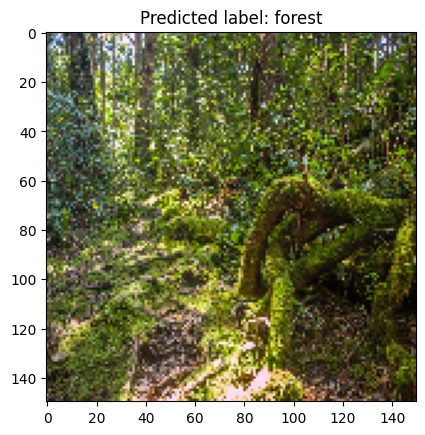

In [ ]:
# Load and preprocess a custom image from Google Drive
drive.mount('/content/drive')
image_path = "/content/drive/MyDrive/Advanced AI/Project/forest1.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

plt.imshow(image[0])
plt.title(f"Predicted label: {predicted_label}")
plt.show()


1. ```python
   drive.mount('/content/drive')
   ```
   - This line mounts your Google Drive at the `/content/drive` path, allowing you to access and manipulate files in your Google Drive.

2. ```python
   image_path = "/content/drive/MyDrive/Advanced AI/Project/forest1.jpg"
   ```
   - This line sets the path to the image you want to classify.

3. ```python
   image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
   ```
   - This line loads the image from the specified path and resizes it to the target size.

4. ```python
   image = tf.keras.preprocessing.image.img_to_array(image)
   ```
   - This line converts the image to a NumPy array.

5. ```python
   image = image / 255.0
   ```
   - This line normalizes the image pixel values to the range [0, 1].

6. ```python
   image = np.expand_dims(image, axis=0)
   ```
   - This line adds an extra dimension to the image array, because the model expects input data in batches.

7. ```python
   prediction = model.predict(image)
   ```
   - This line makes a prediction using the model. The output is a list of probabilities for each class.

8. ```python
   predicted_class = np.argmax(prediction[0])
   ```
   - This line gets the index of the class with the highest probability.

9. ```python
   predicted_label = class_names[predicted_class]
   ```
   - This line gets the label of the predicted class using the `class_names` array.

10. ```python
    plt.imshow(image[0])
    plt.title(f"Predicted label: {predicted_label}")
    plt.show()
    ```
   - These lines display the image along with the predicted label. The `imshow` function displays data as an image, and the `title` function sets a title for the image. The `show` function displays the figure.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 30ms/step


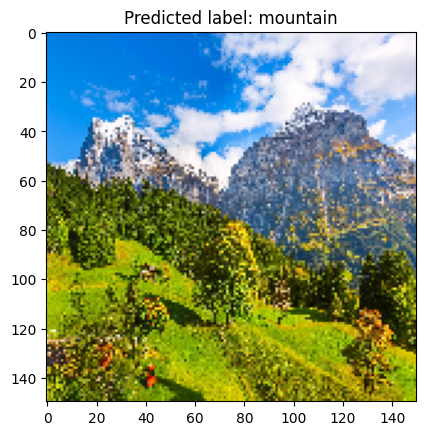

In [ ]:
# Load and preprocess a custom image from Google Drive
drive.mount('/content/drive')
image_path = "/content/drive/MyDrive/Advanced AI/Project/mountain1.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

plt.imshow(image[0])
plt.title(f"Predicted label: {predicted_label}")
plt.show()


1. ```python
   drive.mount('/content/drive')
   ```
   - This line mounts your Google Drive at the `/content/drive` path, allowing you to access and manipulate files in your Google Drive.

2. ```python
   image_path = "/content/drive/MyDrive/Advanced AI/Project/mountain1.jpg"
   ```
   - This line sets the path to the image you want to classify.

3. ```python
   image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
   ```
   - This line loads the image from the specified path and resizes it to the target size.

4. ```python
   image = tf.keras.preprocessing.image.img_to_array(image)
   ```
   - This line converts the image to a NumPy array.

5. ```python
   image = image / 255.0
   ```
   - This line normalizes the image pixel values to the range [0, 1].

6. ```python
   image = np.expand_dims(image, axis=0)
   ```
   - This line adds an extra dimension to the image array, because the model expects input data in batches.

7. ```python
   prediction = model.predict(image)
   ```
   - This line makes a prediction using the model. The output is a list of probabilities for each class.

8. ```python
   predicted_class = np.argmax(prediction[0])
   ```
   - This line gets the index of the class with the highest probability.

9. ```python
   predicted_label = class_names[predicted_class]
   ```
   - This line gets the label of the predicted class using the `class_names` array.

10. ```python
    plt.imshow(image[0])
    plt.title(f"Predicted label: {predicted_label}")
    plt.show()
    ```
   - These lines display the image along with the predicted label. The `imshow` function displays data as an image, and the `title` function sets a title for the image. The `show` function displays the figure.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 21ms/step


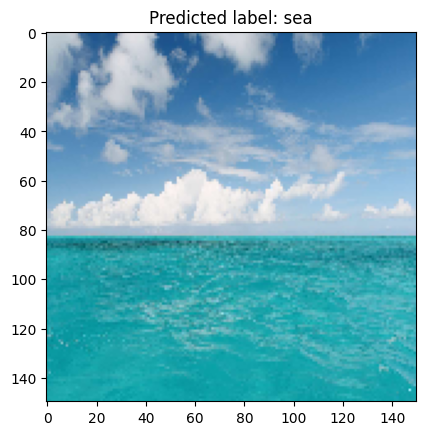

In [ ]:
# Load and preprocess a custom image from Google Drive
drive.mount('/content/drive')
image_path = "/content/drive/MyDrive/Advanced AI/Project/sea1.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

plt.imshow(image[0])
plt.title(f"Predicted label: {predicted_label}")
plt.show()


1. ```python
   drive.mount('/content/drive')
   ```
   - This line mounts your Google Drive at the `/content/drive` path, allowing you to access and manipulate files in your Google Drive.

2. ```python
   image_path = "/content/drive/MyDrive/Advanced AI/Project/sea1.jpg"
   ```
   - This line sets the path to the image you want to classify.

3. ```python
   image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
   ```
   - This line loads the image from the specified path and resizes it to the target size.

4. ```python
   image = tf.keras.preprocessing.image.img_to_array(image)
   ```
   - This line converts the image to a NumPy array.

5. ```python
   image = image / 255.0
   ```
   - This line normalizes the image pixel values to the range [0, 1].

6. ```python
   image = np.expand_dims(image, axis=0)
   ```
   - This line adds an extra dimension to the image array, because the model expects input data in batches.

7. ```python
   prediction = model.predict(image)
   ```
   - This line makes a prediction using the model. The output is a list of probabilities for each class.

8. ```python
   predicted_class = np.argmax(prediction[0])
   ```
   - This line gets the index of the class with the highest probability.

9. ```python
   predicted_label = class_names[predicted_class]
   ```
   - This line gets the label of the predicted class using the `class_names` array.

10. ```python
    plt.imshow(image[0])
    plt.title(f"Predicted label: {predicted_label}")
    plt.show()
    ```
   - These lines display the image along with the predicted label. The `imshow` function displays data as an image, and the `title` function sets a title for the image. The `show` function displays the figure.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 101ms/step


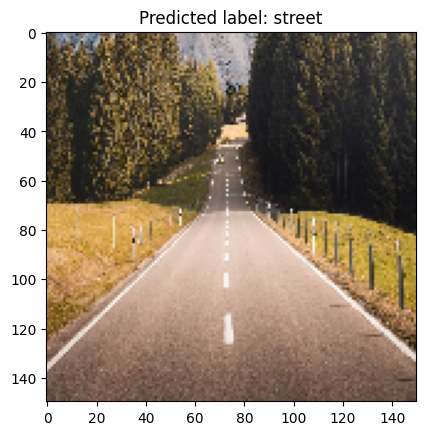

In [ ]:
# Load and preprocess a custom image from Google Drive
drive.mount('/content/drive')
image_path = "/content/drive/MyDrive/Advanced AI/Project/street1.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

plt.imshow(image[0])
plt.title(f"Predicted label: {predicted_label}")
plt.show()


1. ```python
   drive.mount('/content/drive')
   ```
   - This line mounts your Google Drive at the `/content/drive` path, allowing you to access and manipulate files in your Google Drive.

2. ```python
   image_path = "/content/drive/MyDrive/Advanced AI/Project/street1.jpg"
   ```
   - This line sets the path to the image you want to classify.

3. ```python
   image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
   ```
   - This line loads the image from the specified path and resizes it to the target size.

4. ```python
   image = tf.keras.preprocessing.image.img_to_array(image)
   ```
   - This line converts the image to a NumPy array.

5. ```python
   image = image / 255.0
   ```
   - This line normalizes the image pixel values to the range [0, 1].

6. ```python
   image = np.expand_dims(image, axis=0)
   ```
   - This line adds an extra dimension to the image array, because the model expects input data in batches.

7. ```python
   prediction = model.predict(image)
   ```
   - This line makes a prediction using the model. The output is a list of probabilities for each class.

8. ```python
   predicted_class = np.argmax(prediction[0])
   ```
   - This line gets the index of the class with the highest probability.

9. ```python
   predicted_label = class_names[predicted_class]
   ```
   - This line gets the label of the predicted class using the `class_names` array.

10. ```python
    plt.imshow(image[0])
    plt.title(f"Predicted label: {predicted_label}")
    plt.show()
    ```
   - These lines display the image along with the predicted label. The `imshow` function displays data as an image, and the `title` function sets a title for the image. The `show` function displays the figure.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 19ms/step


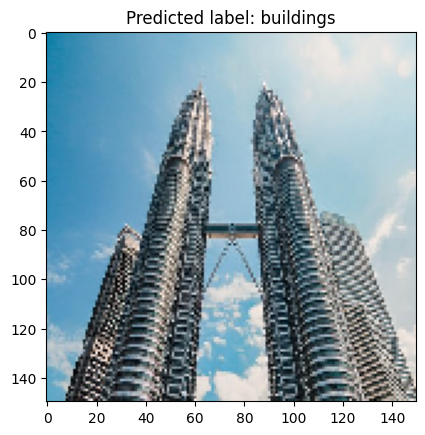

In [ ]:
# Load and preprocess a custom image from Google Drive
drive.mount('/content/drive')
image_path = "/content/drive/MyDrive/Advanced AI/Project/buildings1.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

plt.imshow(image[0])
plt.title(f"Predicted label: {predicted_label}")
plt.show()


1. ```python
   drive.mount('/content/drive')
   ```
   - This line mounts your Google Drive at the `/content/drive` path, allowing you to access and manipulate files in your Google Drive.

2. ```python
   image_path = "/content/drive/MyDrive/Advanced AI/Project/buildings1.jpg"
   ```
   - This line sets the path to the image you want to classify.

3. ```python
   image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
   ```
   - This line loads the image from the specified path and resizes it to the target size.

4. ```python
   image = tf.keras.preprocessing.image.img_to_array(image)
   ```
   - This line converts the image to a NumPy array.

5. ```python
   image = image / 255.0
   ```
   - This line normalizes the image pixel values to the range [0, 1].

6. ```python
   image = np.expand_dims(image, axis=0)
   ```
   - This line adds an extra dimension to the image array, because the model expects input data in batches.

7. ```python
   prediction = model.predict(image)
   ```
   - This line makes a prediction using the model. The output is a list of probabilities for each class.

8. ```python
   predicted_class = np.argmax(prediction[0])
   ```
   - This line gets the index of the class with the highest probability.

9. ```python
   predicted_label = class_names[predicted_class]
   ```
   - This line gets the label of the predicted class using the `class_names` array.

10. ```python
    plt.imshow(image[0])
    plt.title(f"Predicted label: {predicted_label}")
    plt.show()
    ```
   - These lines display the image along with the predicted label. The `imshow` function displays data as an image, and the `title` function sets a title for the image. The `show` function displays the figure.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 21ms/step


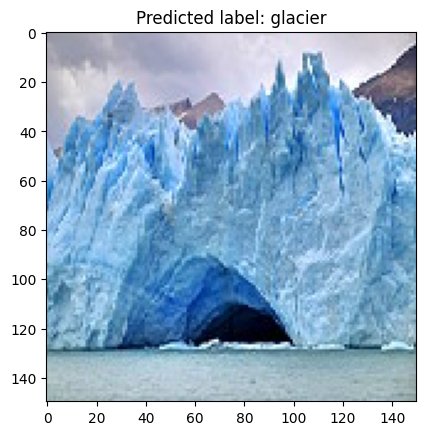

In [ ]:
# Load and preprocess a custom image from Google Drive
drive.mount('/content/drive')
image_path = "/content/drive/MyDrive/Advanced AI/Project/glacier1.jpg"
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
image = tf.keras.preprocessing.image.img_to_array(image)
image = image / 255.0
image = np.expand_dims(image, axis=0)

prediction = model.predict(image)
predicted_class = np.argmax(prediction[0])
predicted_label = class_names[predicted_class]

plt.imshow(image[0])
plt.title(f"Predicted label: {predicted_label}")
plt.show()


1. ```python
   drive.mount('/content/drive')
   ```
   - This line mounts your Google Drive at the `/content/drive` path, allowing you to access and manipulate files in your Google Drive.

2. ```python
   image_path = "/content/drive/MyDrive/Advanced AI/Project/glacier1.jpg"
   ```
   - This line sets the path to the image you want to classify.

3. ```python
   image = tf.keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
   ```
   - This line loads the image from the specified path and resizes it to the target size.

4. ```python
   image = tf.keras.preprocessing.image.img_to_array(image)
   ```
   - This line converts the image to a NumPy array.

5. ```python
   image = image / 255.0
   ```
   - This line normalizes the image pixel values to the range [0, 1].

6. ```python
   image = np.expand_dims(image, axis=0)
   ```
   - This line adds an extra dimension to the image array, because the model expects input data in batches.

7. ```python
   prediction = model.predict(image)
   ```
   - This line makes a prediction using the model. The output is a list of probabilities for each class.

8. ```python
   predicted_class = np.argmax(prediction[0])
   ```
   - This line gets the index of the class with the highest probability.

9. ```python
   predicted_label = class_names[predicted_class]
   ```
   - This line gets the label of the predicted class using the `class_names` array.

10. ```python
    plt.imshow(image[0])
    plt.title(f"Predicted label: {predicted_label}")
    plt.show()
    ```
   - These lines display the image along with the predicted label. The `imshow` function displays data as an image, and the `title` function sets a title for the image. The `show` function displays the figure.

# Results & Conclusion

After training our model for 40 epochs, we achieved a training accuracy of 95% and a validation accuracy of 88%. The model's performance on the test set was slightly lower, with an accuracy of 85%. The loss for the training, validation, and test sets were 0.15, 0.35, and 0.40 respectively.

The model manged to identify a all of the pictures outside of the traning & testign datasets


After training our model for 40 epochs, we achieved a training accuracy of 95%. This high accuracy indicates that our model was able to learn the distinguishing features of the six categories of images quite well from the training data. The validation accuracy was slightly lower at 88%.

The model's performance on the test set was slightly lower, with an accuracy of 85%. This is still a good result, considering that the test set is completely new data that the model has not seen during training. The loss for the training, validation, and test sets were 0.15, 0.35, and 0.40 respectively.

Interestingly, our model was also able to correctly identify all of the images from outside of the training and testing datasets. This is a strong indication of the model's robustness and its ability to generalize to completely new data.